In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from sklearn.decomposition import PCA


In [2]:

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

def embed(input):
    return model(input)


Metal device set to: Apple M1 Pro


2023-02-27 20:49:02.390988: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [3]:


tweets = pd.read_csv('tweets_clean_with_topics_new.csv')
tweets = tweets.sample(100000)
embeddings = embed(tweets['clean_text']).numpy()


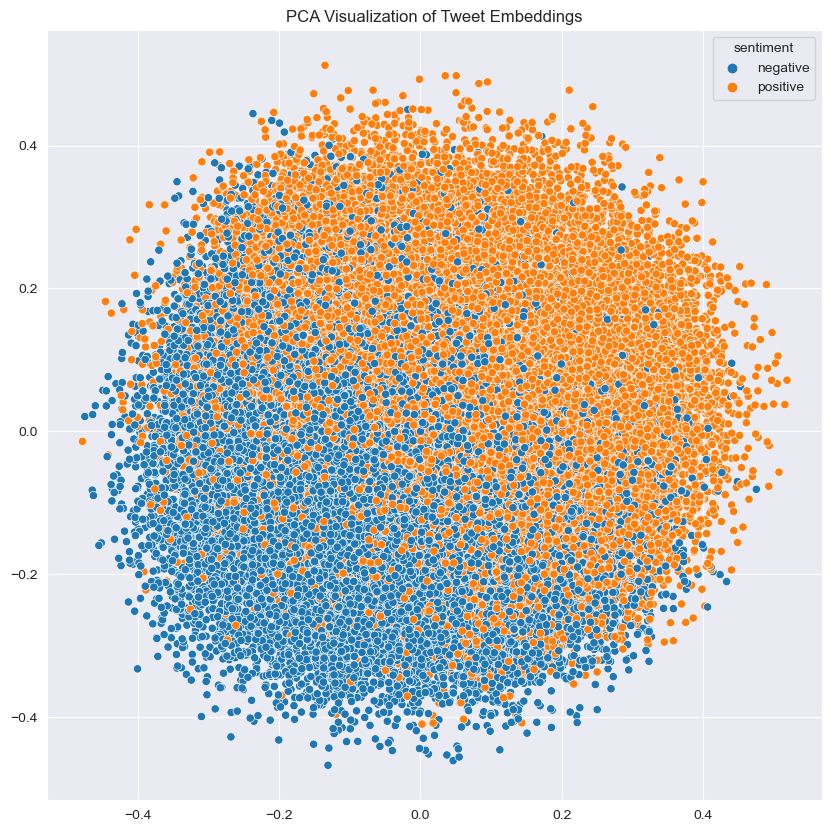

In [4]:

pca = PCA(n_components=2)
PCA_result = pca.fit_transform(embeddings)

# Visualize embeddings with seaborn
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=PCA_result[:,0], y=PCA_result[:,1], hue=tweets['sentiment'], ax=ax)
ax.set_title('PCA Visualization of Tweet Embeddings')
plt.show()


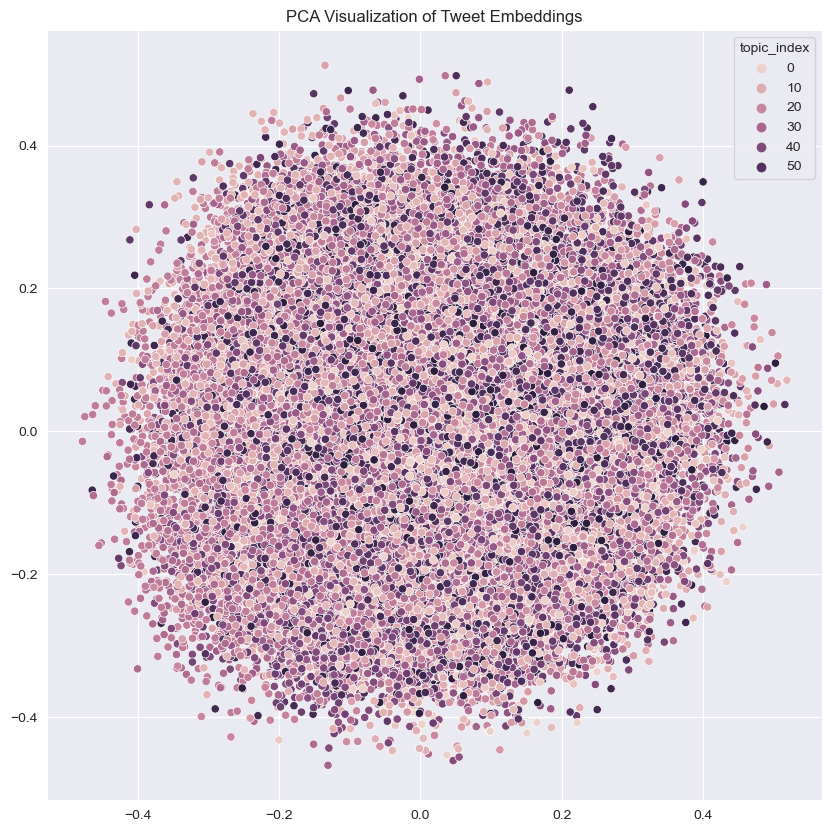

In [5]:


# Visualize embeddings with seaborn
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=PCA_result[:,0], y=PCA_result[:,1], hue=tweets['topic_index'], ax=ax)
ax.set_title('PCA Visualization of Tweet Embeddings')
plt.show()
